# **Exploratory Data Analysis(EDA)**

## **1.0 Import libraries**

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings("ignore")

## **2.0 Load Dataset**

In [ ]:
df=pd.read_csv('../Artifacts/raw_data.csv')

In [144]:
# Mximum columns view
pd.set_option('display.max_column', None)

## **3.0 Exploring Dataset**

**Head Of Dataset**

In [145]:
# First 5 rows
df.head()

,ham/spam,Subject,Content
0,ham,Subject: christmas tree farm pictures,NaN
1,ham,"Subject: vastar resources , inc .","gary , production from the high island larger ..."
2,ham,Subject: calpine daily gas nomination,- calpine daily gas nomination 1 . doc
3,ham,Subject: re : issue,fyi - see note below - already done .\nstella\...
4,ham,Subject: meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...


**Information about the dataset**

In [146]:
## Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37597 entries, 0 to 37596
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ham/spam  37597 non-null  object
 1   Subject   37597 non-null  object
 2   Content   37194 non-null  object
dtypes: object(3)
memory usage: 881.3+ KB


**Spam/Ham Distribution**

In [147]:
## Spam/Ham Distribution
df['ham/spam'].value_counts()

ham/spam
ham     20217
spam    17380
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='ham/spam'>

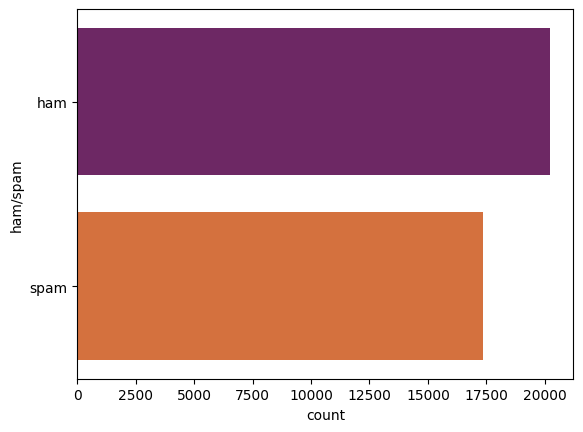

In [148]:
# Countplot to visualize the distribution
sns.countplot(df['ham/spam'],palette='inferno')

**Checking Duplicates**

In [149]:
# Checks if any duplicate present
df.duplicated().any()

np.True_

In [150]:
# Count of duplicates
df.duplicated().sum()

np.int64(7104)

In [151]:
# Sneak peak of duplicates
df[df.duplicated()].head()

,ham/spam,Subject,Content
505,ham,Subject: calpine daily gas nomination,- calpine daily gas nomination 1 . doc
1209,ham,Subject: cornhusker - gas management,i thought it might be helpful to summarize the...
1228,ham,Subject: re : cornhusker,"john ,\ni did some preliminary work on your qu..."
1276,ham,Subject: cleburne,"daren & john ,\nsee the attached document rega..."
1292,ham,Subject: calpine daily gas nomination,>\nricky a . archer\nfuel supply\n700 louisian...


In [152]:
# Shape of duplicates
df[df["Subject"]=="Subject: calpine daily gas nomination"].shape

(84, 3)

- `Subject:`, `\n` and some other abnormalities are also present in text. These should be removed. 
- Some Contents are empty.
- Data is balanced.
- Dataset have some duplicates also.

## **4.0 Data Cleaning**

**Dropping Duplicates**

In [153]:
# Dropping the duplicates
df.drop_duplicates(inplace=True)

In [154]:
# Checking if still presents
df.duplicated().sum()

np.int64(0)

**Removing useless `Subject:`**

In [155]:
# Counts len of dataset and count of 'Subject:'
print(f"Length of Dataset is: {len(df)} while features have 'Subject:' is: {df["Subject"].str.contains("Subject:").sum()}")

Length of Dataset is: 30493 while features have 'Subject:' is: 30493


In [156]:
# Removing 'Subject:'
df["Subject"]=df["Subject"].str.replace("Subject:","")

In [157]:
# Removing leading and trailing whitespaces
df['Subject'] = df['Subject'].str.strip()

**Checking for Null Values**

In [158]:
# Checking for null values
df[df["Content"].isnull()].count()

ham/spam    260
Subject     260
Content       0
dtype: int64

In [159]:
print(df[(df["Content"].isnull()) & (df["ham/spam"] == "spam")].count())
print(df[(df["Content"].isnull()) & (df["ham/spam"] == "spam")].sample(5))

ham/spam    211
Subject     211
Content       0
dtype: int64
      ham/spam                                 Subject Content
23669     spam                            free x - box     NaN
7781      spam              get your viagr $ a today !     NaN
23782     spam   all alone ? need somoene to talk to ?     NaN
8712      spam                                    note     NaN
8113      spam  - want a new laptop ? - get one free !     NaN


In [160]:
print(df[(df["Content"].isnull()) & (df["ham/spam"] == "ham")].count())
print(df[(df["Content"].isnull()) & (df["ham/spam"] == "ham")].sample(5))

ham/spam    49
Subject     49
Content      0
dtype: int64
      ham/spam                                            Subject Content
3273       ham                                gymnastics pictures     NaN
3271       ham  imperial sugar ' s volumes will be 142 , 000 -...     NaN
17642      ham                                please see attached     NaN
17732      ham  are we doing atm rings for sempra and kinder ?...     NaN
304        ham  http : / / www . pge - texas . com / www / gtt...     NaN


- It looks that null values are due file attached or everything explained in the `Subject` feature.
- We will Fill Missings of content with `Everything explained in the Subject or file attached`.

In [161]:
df["Content"].fillna("Everything explained in the Subject or file attached",inplace=True)

- I found that Subject also are empty. If yes, it need to be fixed.

In [162]:
# Shape of features having no subject
df[df["Subject"]==''].shape

(199, 3)

In [163]:
# Shape of Dataset
df.shape

(30493, 3)

In [164]:
# Storing them in new df and dropping from original
test_df=df[df["Subject"]=='']
df.drop(test_df.index,inplace=True)

In [165]:
# Now dataset becomes
df.shape

(30294, 3)

In [166]:
test_df.head()

,ham/spam,Subject,Content
3699,spam,,holiday specials on : didrex and nasacort\n60 ...
3708,spam,,the only solution to penis\nenlargement\nnzzbq...
3749,spam,,Everything explained in the Subject or file at...
3777,spam,,to _ cc _ default _ handler\nsubject : [ spam ...
3820,spam,,"discount meds right from home\nvalium , xanax ..."


In [167]:
test_df["Subject"]=df['Subject'].str.replace("No Subject","")
test_df["Subject"].fillna("No Subject",inplace=True)
test_df.head()

,ham/spam,Subject,Content
3699,spam,No Subject,holiday specials on : didrex and nasacort\n60 ...
3708,spam,No Subject,the only solution to penis\nenlargement\nnzzbq...
3749,spam,No Subject,Everything explained in the Subject or file at...
3777,spam,No Subject,to _ cc _ default _ handler\nsubject : [ spam ...
3820,spam,No Subject,"discount meds right from home\nvalium , xanax ..."


- Now we can merge both the dataframes to original form.

In [168]:
df=pd.concat([df,test_df])

In [169]:
df.head()

,ham/spam,Subject,Content
0,ham,christmas tree farm pictures,Everything explained in the Subject or file at...
1,ham,"vastar resources , inc .","gary , production from the high island larger ..."
2,ham,calpine daily gas nomination,- calpine daily gas nomination 1 . doc
3,ham,re : issue,fyi - see note below - already done .\nstella\...
4,ham,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...


In [170]:
df.isnull().sum()

ham/spam    0
Subject     0
Content     0
dtype: int64

In [171]:
df.shape

(30493, 3)

- Our Clean Data is ready for the next step.

In [ ]:
df.to_csv('../Artifacts/clean_data.csv',index=False)